<a href="https://colab.research.google.com/github/prithvivinodnair/ML-Classification-Algorithms/blob/main/PA2_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('dataset_KNN.csv')

# Display the first few rows of the dataset
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


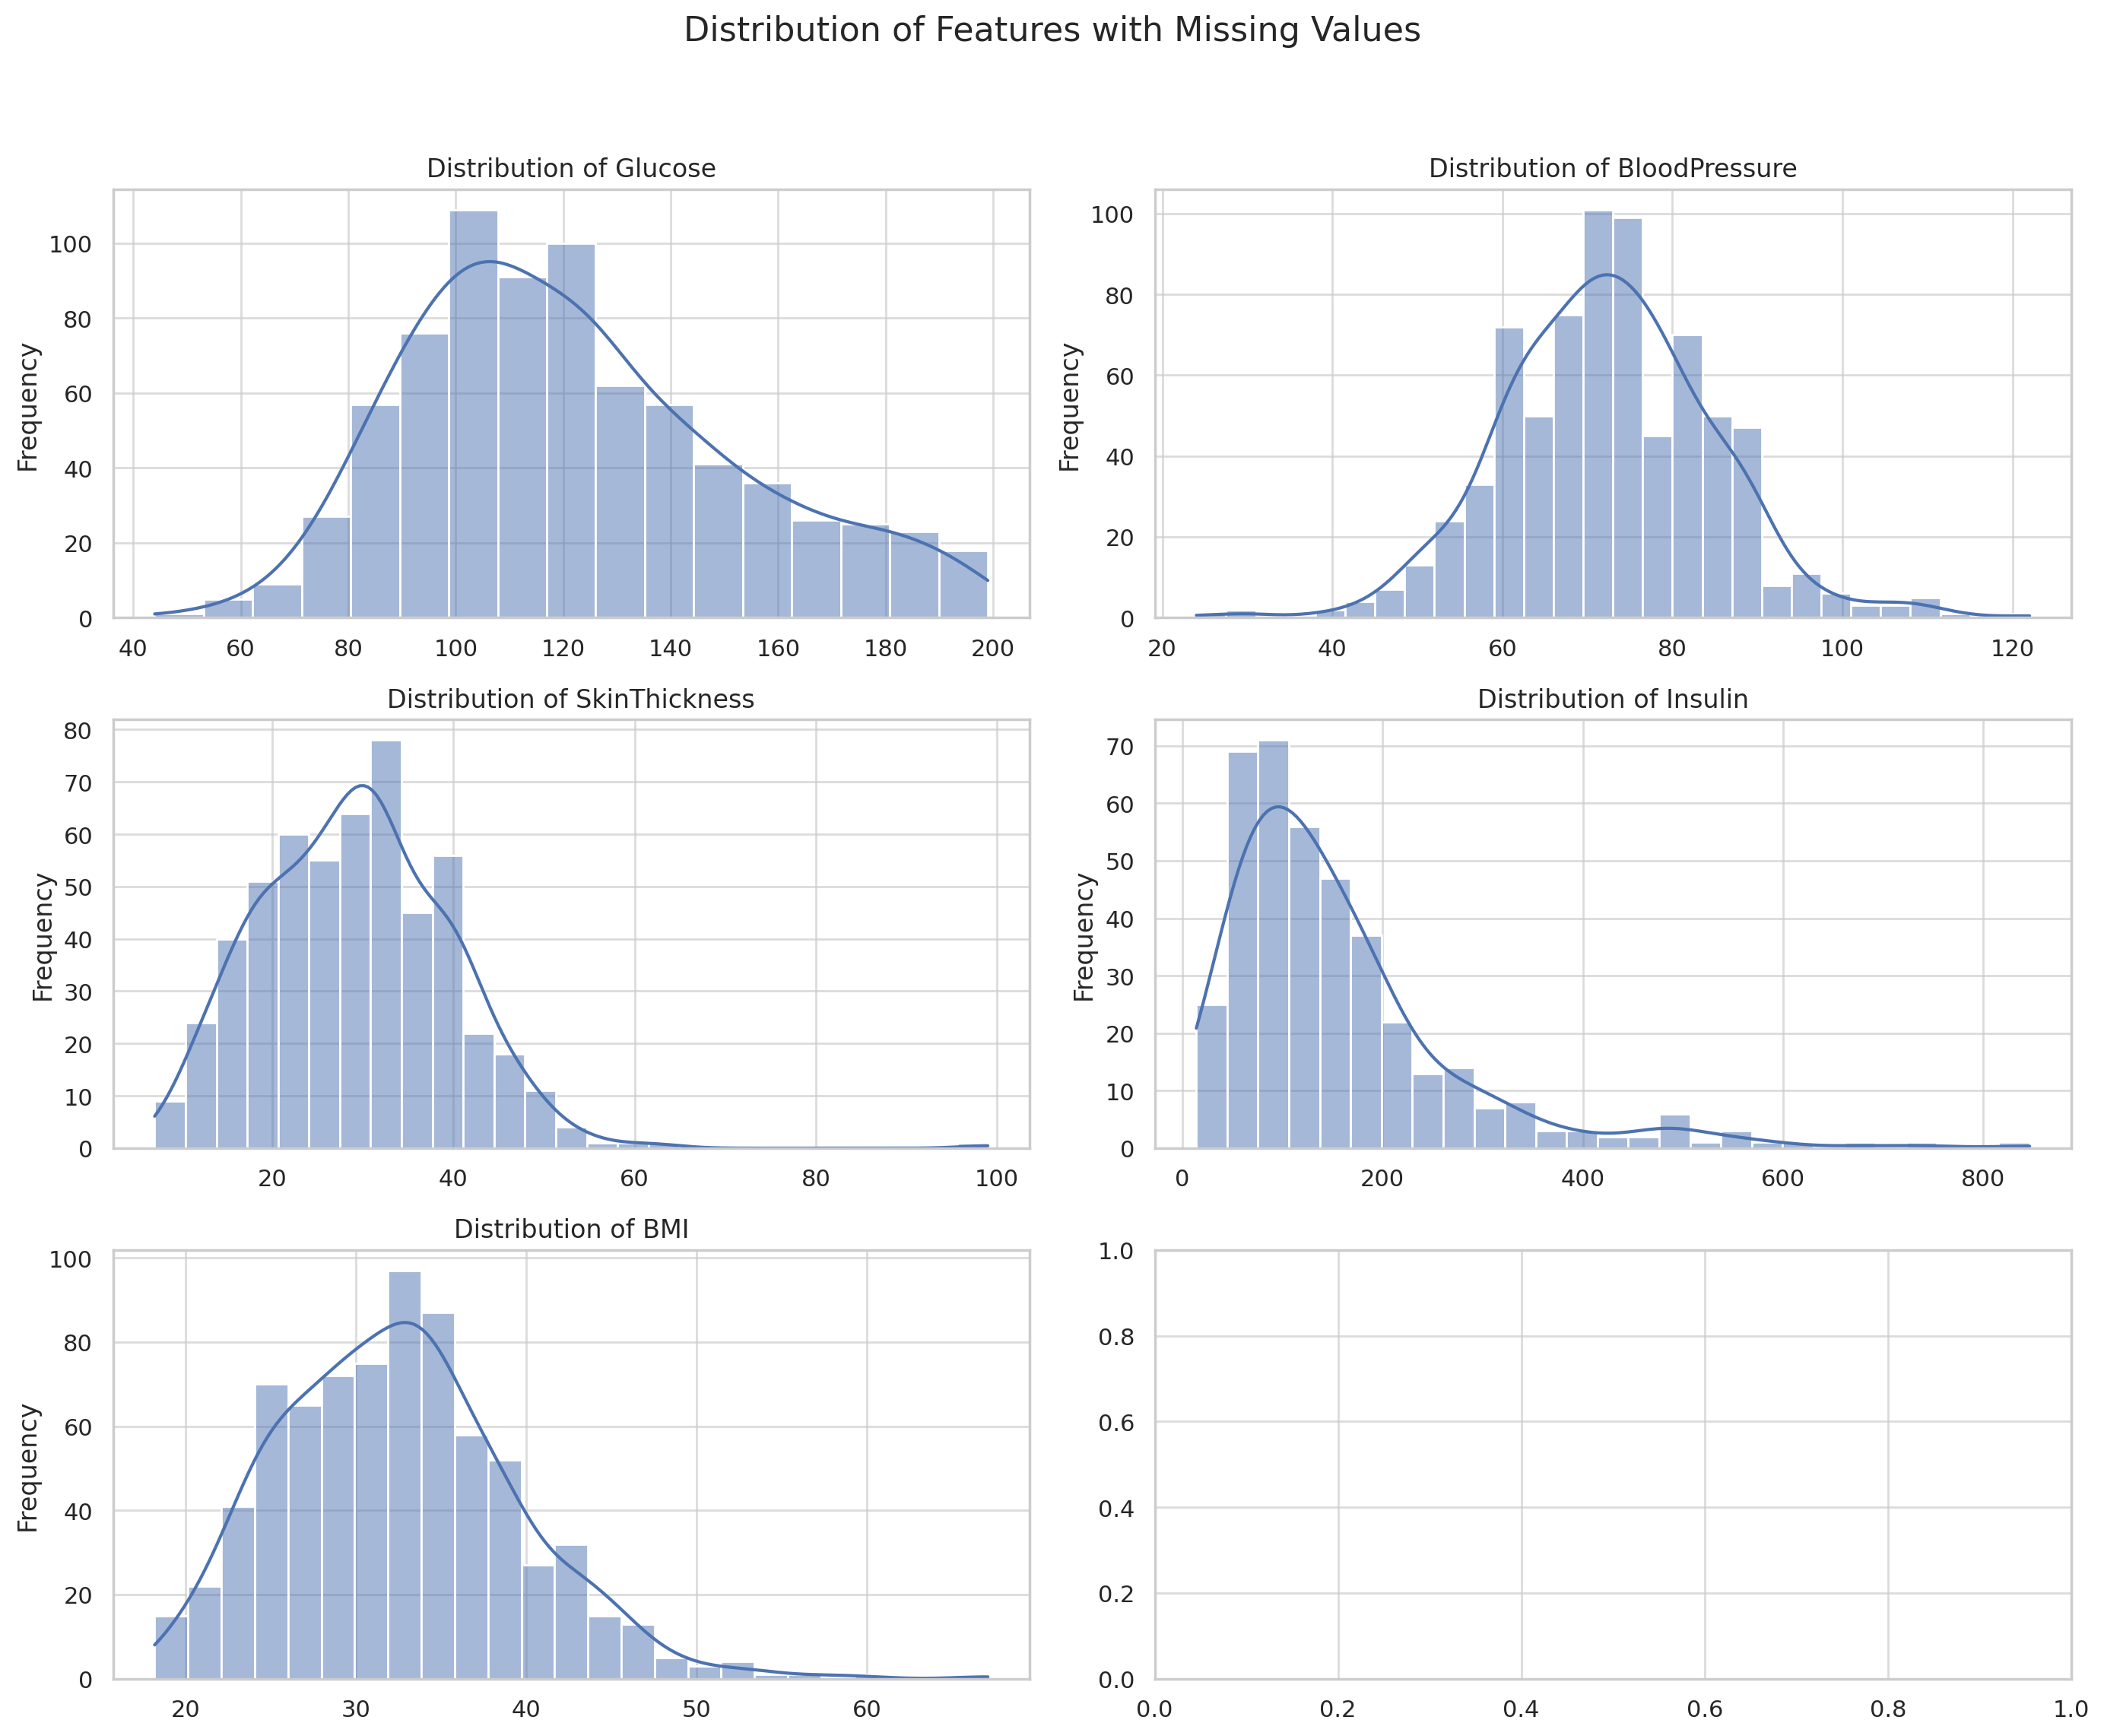

I have imported the image from another python file showing histogram data for attributes to do better data preprocessing.

Given the distributions we've observed for each feature with missing values, here are some tailored imputation strategies:

# **Glucose and Blood Pressure:**

Since these features are roughly normally distributed, mean imputation could be appropriate here as it won't be heavily influenced by outliers.

# **SkinThickness and Insulin:**

These features are right-skewed. Median imputation might be better for these to handle the skewness and potential outliers more robustly.

# **BMI:**

This feature is close to normal but has a slight right skew. Median imputation could also be a good choice here to maintain the central tendency without the influence of outliers.

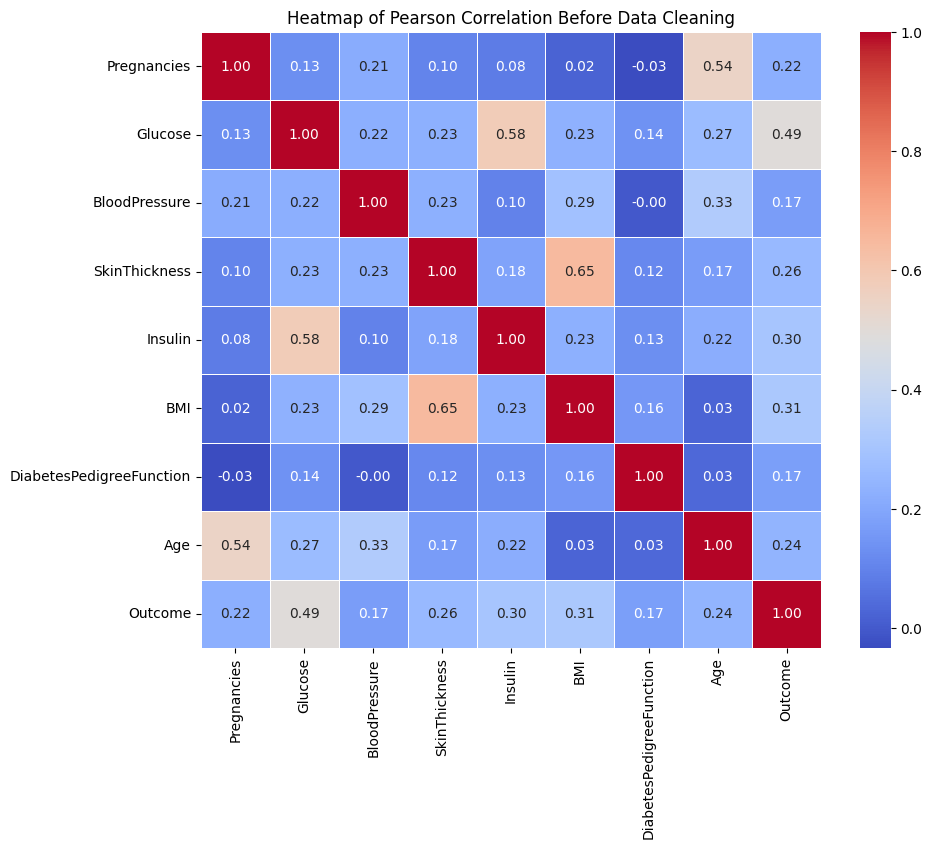

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('dataset_KNN.csv')

# Calculate the Pearson correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap for the correlation matrix before cleaning data
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Pearson Correlation Before Data Cleaning')
plt.show()


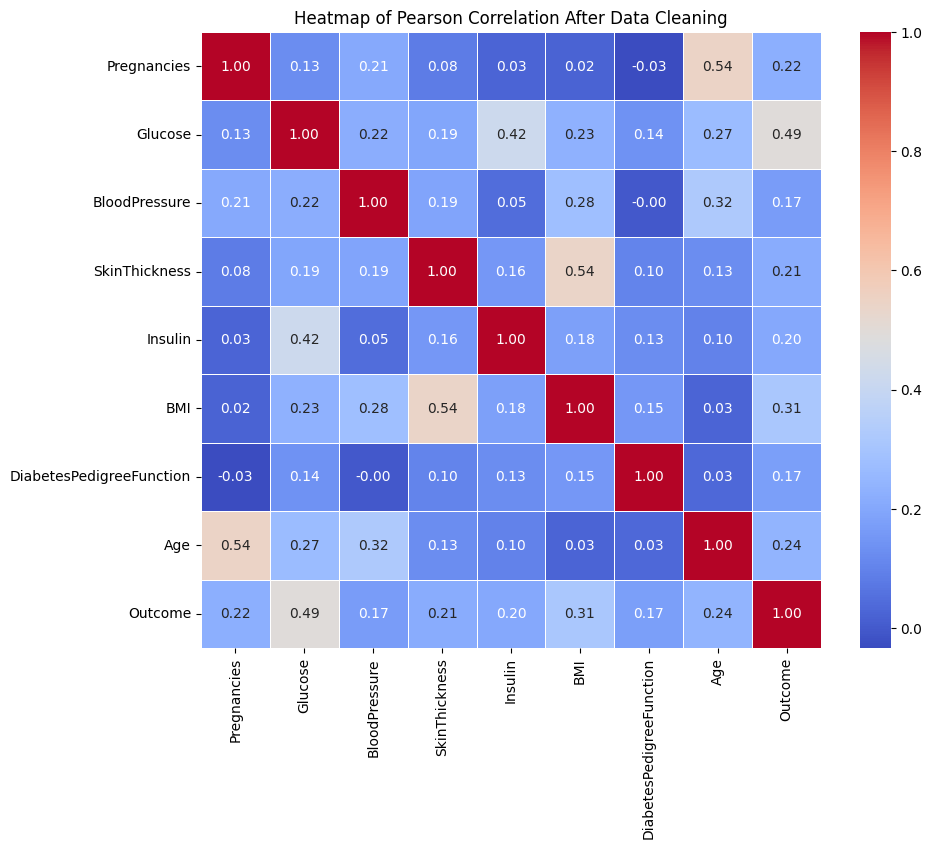

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('dataset_KNN.csv')

# Creating imputers based on the strategy for each feature
imputer_mean = SimpleImputer(strategy='mean')  # For Glucose and Blood Pressure
imputer_median = SimpleImputer(strategy='median')  # For SkinThickness, Insulin, BMI

# Columns to impute with mean
mean_columns = ['Glucose', 'BloodPressure']
data[mean_columns] = imputer_mean.fit_transform(data[mean_columns])

# Columns to impute with median
median_columns = ['SkinThickness', 'Insulin', 'BMI']
data[median_columns] = imputer_median.fit_transform(data[median_columns])

# Calculate the updated Pearson correlation matrix after imputation
updated_correlation_matrix = data.corr()

# Plot the updated heatmap for the correlation matrix after cleaning data
plt.figure(figsize=(10, 8))
sns.heatmap(updated_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Pearson Correlation After Data Cleaning')
plt.show()


# **Key Observations:**

# **Stable Correlation Structure:**

The correlations between variables remain largely consistent before and after data cleaning, indicating that the imputation methods (mean and median) effectively preserved the relationships without introducing significant bias.

# **Subtle Adjustments in Correlation Strengths:**

Minor adjustments in correlation strengths are evident, particularly for features with many initially missing values, like Insulin and SkinThickness. These changes suggest a refined representation of relationships due to the filled gaps.

# **Reliable Statistical Representation:**

The completed correlation matrix post-cleaning likely offers a more reliable basis for further analysis and modeling, as all variables are now fully represented without missing data distortions.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data excluding the 'Outcome' column which is the target variable
feature_columns = data.columns.drop('Outcome')
data_scaled = data.copy()
data_scaled[feature_columns] = scaler.fit_transform(data[feature_columns])

# Display the first few rows of the scaled data to verify
print(data_scaled.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.865108      -0.033518       0.670643 -0.181541  0.166619   
1    -0.844885 -1.206162      -0.529859      -0.012301 -0.181541 -0.852200   
2     1.233880  2.015813      -0.695306      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.074652      -0.529859      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.503458      -2.680669       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1  


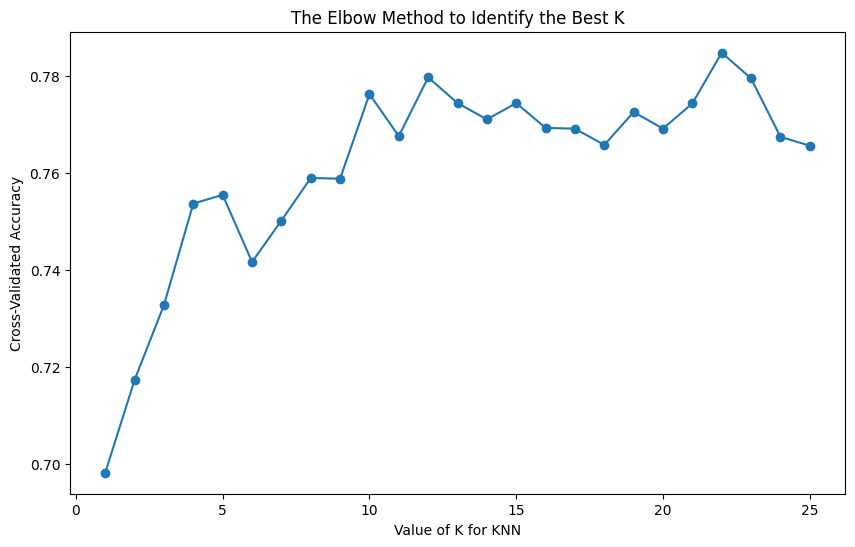

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Split the data into features and target
X = data_scaled[feature_columns]
y = data_scaled['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Range of k to test for the elbow method
k_range = range(1, 26)
k_scores = []

# Perform cross-validation for each value of k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# Plotting the elbow curve to find the best k
plt.figure(figsize=(10, 6))
plt.plot(k_range, k_scores, marker='o')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('The Elbow Method to Identify the Best K')
plt.show()


We can see that from k=0 to k=10 the cross validation accuracy has a steap increase and then it has flucations both declining and increasing hence we proceed to choose k values 8, 10 and 12. he choice of
k=8,10,12 could be influenced by the 'elbow' observed in the plot of model accuracy or error rate vs. k. The 'elbow' is the point after which increases in 𝑘 lead to diminishing returns on model accuracy or increases in error. This method helps in finding a balance between underfitting and overfitting.

In [ ]:
# Calculate the absolute correlation with the Outcome and sort the values
correlation_with_outcome = data.corr()['Outcome'].abs().sort_values(ascending=False)

# Extract the top three attributes excluding 'Outcome' itself and store their names
top_three_features = correlation_with_outcome[1:4].index.tolist()
print("Top three features based on correlation with Outcome:", top_three_features)



Top three features based on correlation with Outcome: ['Glucose', 'BMI', 'Age']


In [ ]:
from sklearn.metrics import accuracy_score

# Use the actual top three feature names obtained from correlation
k_values = [8, 10, 12]
results = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train[top_three_features], y_train)  # Using actual feature names
    y_pred = knn.predict(X_test[top_three_features])
    accuracy = accuracy_score(y_test, y_pred)
    results[k] = accuracy

# Print results
print("Accuracy for different k values:")
for k, accuracy in results.items():
    print(f"k = {k}: Accuracy = {accuracy:.4f}")


Accuracy for different k values:
k = 8: Accuracy = 0.7708
k = 10: Accuracy = 0.7500
k = 12: Accuracy = 0.7344


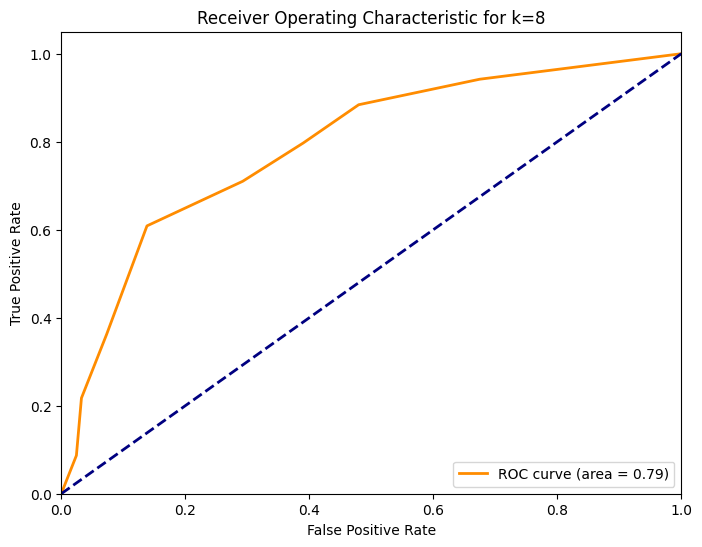

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Initialize the KNN classifier with k = 8
knn_best = KNeighborsClassifier(n_neighbors=8, metric='euclidean')

# Fit the classifier on the training data
knn_best.fit(X_train[top_three_features], y_train)

# Predict probabilities for the test data
y_scores = knn_best.predict_proba(X_test[top_three_features])[:, 1]  # Probabilities for the positive class

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for k=8')
plt.legend(loc="lower right")
plt.show()


Results for k = 8:
Confusion Matrix:
[[106  17]
 [ 27  42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       123
           1       0.71      0.61      0.66        69

    accuracy                           0.77       192
   macro avg       0.75      0.74      0.74       192
weighted avg       0.77      0.77      0.77       192


--------------------------------------------------

Results for k = 10:
Confusion Matrix:
[[105  18]
 [ 30  39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       123
           1       0.68      0.57      0.62        69

    accuracy                           0.75       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.74      0.75      0.74       192


--------------------------------------------------

Results for k = 12:
Confusion Matrix:
[[102  21]
 [ 30  39]]

Classific

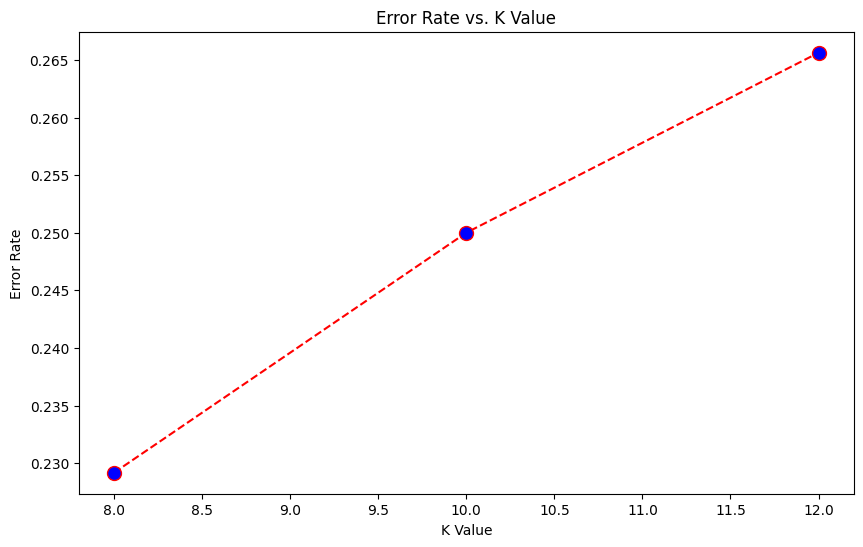

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

k_values = [8, 10, 12]
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train[top_three_features], y_train)
    y_pred = knn.predict(X_test[top_three_features])

    # Error rate
    error = np.mean(y_pred != y_test)
    error_rates.append(error)

    # Print confusion matrix and classification report
    print(f"Results for k = {k}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

# Plotting error rate vs. k-value
plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()


# **Report**

# **Nearest Neighbors Method and Importance of Scaling:**

The Nearest Neighbors method, specifically K-Nearest Neighbors (KNN), is a simple, instance-based learning algorithm used for classification and regression. It predicts the label of a data point by looking at the 'k' closest labeled data points and taking a majority vote (for classification) or averaging the labels (for regression). Scaling is crucial in KNN because it relies on distances between data points to determine their similarity. Without scaling, features with larger scales dominate the distance calculations, which can lead to biased results that do not accurately reflect the similarities in the data.

# **Criteria for Selecting Attributes and Alternatives:**

The three attributes were selected based on their Pearson correlation coefficients with the target variable, choosing those with the highest absolute values. This method ensures that the features most strongly associated with the outcome are used for the model. Alternatives could include attributes that are part of significant interactions or those identified through domain-specific knowledge. Another approach could be using feature importance from tree-based models, which accounts for nonlinear relationships and interactions.

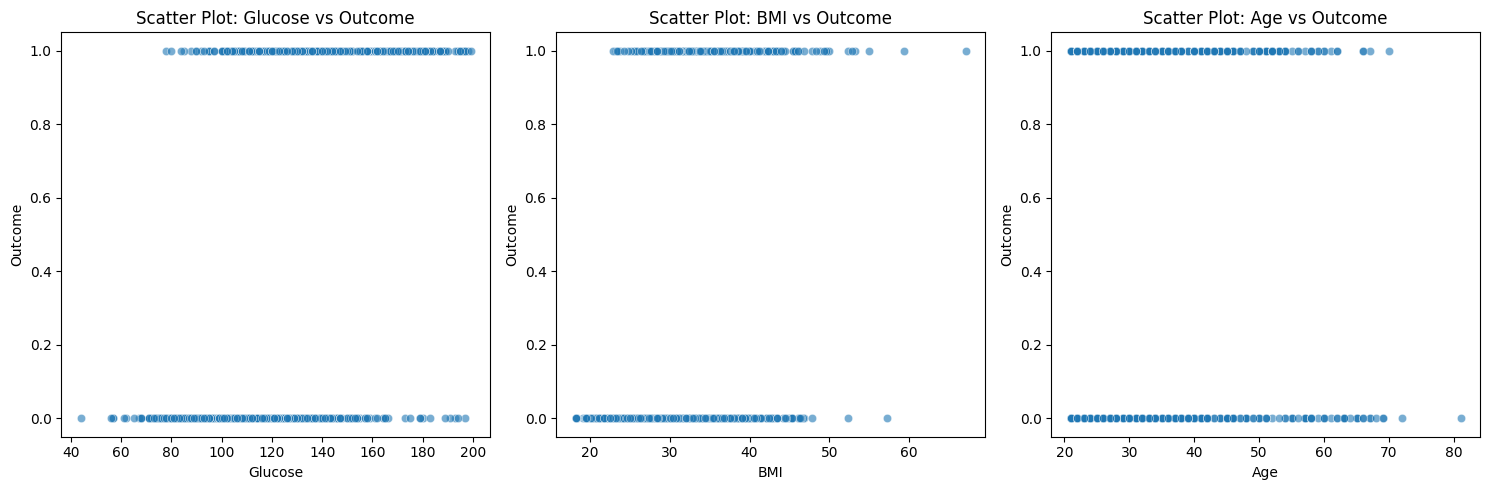

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume the top three features based on earlier analysis (Replace with actual feature names)
top_features = ['Glucose', 'BMI', 'Age']  # Example features

# Creating scatter plots for each feature against the Outcome
plt.figure(figsize=(15, 5))
for i, feature in enumerate(top_features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=data[feature], y=data['Outcome'], alpha=0.6)
    plt.title(f"Scatter Plot: {feature} vs Outcome")
    plt.xlabel(feature)
    plt.ylabel('Outcome')

plt.tight_layout()
plt.show()

Observations from the Scatter Plots of Glucose, BMI, and Age vs. Outcome:

1. **Glucose vs. Outcome:** There is a clear trend where higher glucose levels are more frequently associated with a positive outcome (1). This suggests a strong relationship between glucose levels and the probability of a positive outcome, indicating that glucose is a significant predictor in this context.
  
2. **BMI vs. Outcome:** The scatter plot shows that higher BMI values occasionally correlate with a positive outcome, but the relationship is not as distinct or linear as with glucose. BMI shows some degree of separation between outcomes, but the dispersion is wider, suggesting that while BMI is relevant, it might be less predictive on its own.

3. **Age vs. Outcome:** Age shows very little variation with respect to outcomes, as the distribution of points across different ages is quite uniform for both outcomes. This indicates that age, on its own, may not be a strong predictor of the outcome compared to glucose or BMI.

These observations imply that among the three features, glucose stands out as the most influential in predicting the outcome, followed by BMI with a moderate influence, and age with minimal discriminative power in this specific dataset.

# **Pearson's Correlation Coefficient and Heatmap Observations:**

Pearson's Correlation Coefficient measures the linear relationship between two variables, ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation), with 0 indicating no linear relationship. Observations from the heatmap before and after data cleaning showed that certain relationships were slightly strengthened or became clearer after addressing missing values, suggesting more reliable correlations.

Key Observations:

Stable Correlation Structure:
The correlations between variables remain largely consistent before and after data cleaning, indicating that the imputation methods (mean and median) effectively preserved the relationships without introducing significant bias.

Subtle Adjustments in Correlation Strengths:
Minor adjustments in correlation strengths are evident, particularly for features with many initially missing values, like Insulin and SkinThickness. These changes suggest a refined representation of relationships due to the filled gaps.

Reliable Statistical Representation:
The completed correlation matrix post-cleaning likely offers a more reliable basis for further analysis and modeling, as all variables are now fully represented without missing data distortions.

# **Interpretation of Results Across Different k-Values:**

The optimal 𝑘 value was determined to be 8 based on accuracy and error rate analyses, where 𝑘=8 showed the lowest error rate and a high level of accuracy.

Increasing 𝑘 led to higher error rates, suggesting that larger neighborhoods might include less relevant or more distant points, diluting the classifier's effectiveness.

The ROC curve for 𝑘=8
k=8 demonstrated a good ability to distinguish between classes with an AUC of 0.79, indicating a strong classifier but with potential room for improvement, particularly in enhancing recall for the positive class.